In [33]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from shutil import copyfile

''' test box
train = open("./coco/annotations/test_bbox", "r")
i = 0
for line in train:
    i += 1
    if i < 150:
        continue
    separateLine = line.split()
    imgName = separateLine[0]
    imgPath = os.path.join("coco", "test2017", imgName + ".jpg")
    img = plt.imread(imgPath)
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    
    xmin = (int)(separateLine[1])
    ymin = (int)(separateLine[2])
    xmax = (int)(separateLine[3])
    ymax = (int)(separateLine[4])
    
    rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.show()
    if i > 160:
        break
'''


''' move and rename training images
train = open("cat10.train", "r")
label = {"Ridge": 10, "Island": 11, "Lake": 12, "Crater": 13, "Bend": 14, 
         "Gut": 15, "Gap": 16, "Bay": 17, "Valley": 18, "Basin": 19} 

annoFile = open("./coco/annotations/train_bbox", "w")

for line in train:
    separateLine = line.split(',')
    imgName = separateLine[0].split('/')[1]
    xmin = separateLine[1]
    ymin = separateLine[2]
    xmax = separateLine[3]
    ymax = separateLine[4]
    
    cls = imgName.split('_')[0]
    num = imgName.split('_')[1]
    
    imgPath = os.path.join('rc', imgName)
    imgDest = os.path.join('coco', 'train2017', "{:02d}{}.jpg".format(label[cls], num))
    anno = "{:02d}{} {} {} {} {}\n".format(label[cls], num, xmin, ymin, xmax, ymax)
    copyfile(imgPath, imgDest)
    annoFile.write(anno)
    
train.close()
annoFile.close()
'''

# move and rename testing images
test = open("cat10.test", "r")
label = {"Ridge": 10, "Island": 11, "Lake": 12, "Crater": 13, "Bend": 14, 
         "Gut": 15, "Gap": 16, "Bay": 17, "Valley": 18, "Basin": 19} 

annoFile = open("./coco/annotations/test_bbox", "w")

for line in test:
    separateLine = line.split(',')
    imgName = separateLine[0].split('/')[1]
    xmin = separateLine[1]
    ymin = separateLine[2]
    xmax = separateLine[3]
    ymax = separateLine[4]
    
    cls = imgName.split('_')[0]
    num = imgName.split('_')[1]
    
    imgPath = os.path.join('rc', imgName)
    imgDest = os.path.join('coco', 'test2017', "{:02d}{}.jpg".format(label[cls], num))
    anno = "{:02d}{} {} {} {} {}\n".format(label[cls], num, xmin, ymin, xmax, ymax)
    copyfile(imgPath, imgDest)
    annoFile.write(anno)
    
test.close()
annoFile.close()





In [63]:
import json
from PIL import Image
import os

label = {"Ridge": 10, "Island": 11, "Lake": 12, "Crater": 13, "Bend": 14, 
         "Gut": 15, "Gap": 16, "Bay": 17, "Valley": 18, "Basin": 19} 


data = {}
data['info'] = {}
data['licenses'] = {}
data['images'] = []
data['annotations'] = []
data['categories'] = []


# categories
for k, v in label.items():
    data['categories'].append({"supercategory": "none", "name": k, "id": v%10})

# images
imgs = os.listdir("coco/train2017/")
for img in imgs:
    file_name = img
    width, height = Image.open("coco/train2017/" + file_name).size
    idd = (int)(file_name.split('.')[0])
    data['images'].append({"file_name": file_name, "height": height, "width": width, "id": idd})
    

# annotations
idCount = 1;
box = open("coco/annotations/train_bbox", "r")
for line in box:
    line = line.split()
    image_id = line[0]
    xmin = (int)(line[1])
    ymin = (int)(line[2])
    xmax = (int)(line[3])
    ymax = (int)(line[4])
    width = xmax - xmin
    height = ymax - ymin
    bbox = [xmin, ymin, width, height]
    area = width * height
    category_id = (int)(image_id[:2]) % 10
    image_id = (int)(image_id)
    data['annotations'].append({"id": idCount, "bbox": bbox, "image_id": image_id, "segmentation": [],
                              "ignore": 0, "area": area, "iscrowd": 0, "category_id": category_id})
    idCount += 1

annoFile = open("./coco/annotations/instances_train2017.json", "w")
json.dump(data, annoFile)
annoFile.close()


/home/chiayu/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2600: DecompressionBombWarning: Image size (117462244 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
/home/chiayu/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2600: DecompressionBombWarning: Image size (132227001 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
/home/chiayu/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2600: DecompressionBombWarning: Image size (132940900 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
/home/chiayu/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2600: DecompressionBombWarning: Image size (95902849 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


In [64]:
import json
from PIL import Image
import os

label = {"Ridge": 10, "Island": 11, "Lake": 12, "Crater": 13, "Bend": 14, 
         "Gut": 15, "Gap": 16, "Bay": 17, "Valley": 18, "Basin": 19} 


data = {}
data['info'] = {}
data['licenses'] = {}
data['images'] = []
data['annotations'] = []
data['categories'] = []


# categories
for k, v in label.items():
    data['categories'].append({"supercategory": "none", "name": k, "id": v%10})

# images
imgs = os.listdir("coco/test2017/")
for img in imgs:
    file_name = img
    width, height = Image.open("coco/test2017/" + file_name).size
    idd = (int)(file_name.split('.')[0])
    data['images'].append({"file_name": file_name, "height": height, "width": width, "id": idd})
    

# annotations
idCount = 1;
box = open("coco/annotations/test_bbox", "r")
for line in box:
    line = line.split()
    image_id = line[0]
    xmin = (int)(line[1])
    ymin = (int)(line[2])
    xmax = (int)(line[3])
    ymax = (int)(line[4])
    width = xmax - xmin
    height = ymax - ymin
    bbox = [xmin, ymin, width, height]
    area = width * height
    category_id = (int)(image_id[:2]) % 10
    image_id = (int)(image_id)
    data['annotations'].append({"id": idCount, "bbox": bbox, "image_id": image_id, "segmentation": [],
                              "ignore": 0, "area": area, "iscrowd": 0, "category_id": category_id})
    idCount += 1

annoFile = open("./coco/annotations/instances_test2017.json", "w")
json.dump(data, annoFile)
annoFile.close()


In [50]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

dataDir = 'coco/'
dataType = 'train2017'
annFile = 'coco/annotations/instances_train2017.json'
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


Ridge Island Lake Crater Bend Gut Gap Bay Valley Basin
{'file_name': '11000006.jpg', 'height': 344, 'width': 344, 'id': 11000006}


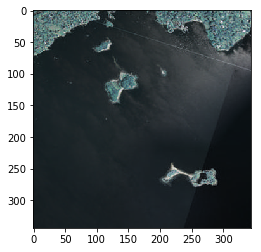

[]
[]


0

In [61]:
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
print ("{}".format(' '.join(nms)))

imgIds = coco.getImgIds(imgIds = [11000006])
img = coco.loadImgs(imgIds)[0]
print (img)
I = io.imread('coco/train2017/' + img['file_name'])
plt.imshow(I)
plt.show()
annIds = coco.getAnnIds(imgIds=img['id'])
print (annIds)
anns = coco.loadAnns(annIds)
print (anns)
coco.showAnns(anns)

In [67]:
import pickle
with open('/home/chiayu/mmdetection/result.pkl', 'rb') as f:
    data = pickle.load(f)
print (data)

[[array([], shape=(0, 5), dtype=float32), array([], shape=(0, 5), dtype=float32), array([], shape=(0, 5), dtype=float32), array([], shape=(0, 5), dtype=float32), array([[7.54470749e+01, 1.56349091e+02, 2.52963501e+02, 2.16367920e+02,
        1.39854476e-01],
       [1.02344513e+02, 1.39479645e+02, 2.83634216e+02, 2.00101273e+02,
        1.77538440e-01],
       [8.59700394e+01, 2.05015289e+02, 2.72422913e+02, 2.61123535e+02,
        1.05144173e-01],
       [1.01354507e+02, 9.44654617e+01, 2.89755005e+02, 1.48020233e+02,
        7.56235719e-02],
       [8.28721924e+01, 1.18441864e+02, 2.64616028e+02, 1.82450775e+02,
        1.49554476e-01],
       [9.15309372e+01, 6.63343201e+01, 2.72001404e+02, 1.31215256e+02,
        6.92508966e-02],
       [4.60193520e+01, 1.30715057e+02, 2.20561035e+02, 2.03759216e+02,
        7.39581138e-02],
       [6.69188309e+01, 2.18992599e+02, 2.45117706e+02, 2.87788483e+02,
        5.07477485e-02],
       [1.11424980e+02, 1.98423218e+02, 2.68412872e+02, 2.2562

In [6]:
## generate training and testing json files for one class
import json
from PIL import Image
import os

# label = {"Ridge": 10, "Island": 11, "Lake": 12, "Crater": 13, "Bend": 14, 
#          "Gut": 15, "Gap": 16, "Bay": 17, "Valley": 18, "Basin": 19} 

label = {"Ridge": 10} 

data = {}
data['info'] = {}
data['licenses'] = {}
data['images'] = []
data['annotations'] = []
data['categories'] = []


# categories
for k, v in label.items():
    data['categories'].append({"supercategory": "none", "name": k, "id": v%10})
print (data['categories'])
    
aaa
# images
imgs = os.listdir("coco/train2017/")
for img in imgs:
    file_name = img
    width, height = Image.open("coco/train2017/" + file_name).size
    idd = (int)(file_name.split('.')[0])
    data['images'].append({"file_name": file_name, "height": height, "width": width, "id": idd})
    

# annotations
idCount = 1;
box = open("coco/annotations/train_bbox", "r")
for line in box:
    line = line.split()
    image_id = line[0]
    xmin = (int)(line[1])
    ymin = (int)(line[2])
    xmax = (int)(line[3])
    ymax = (int)(line[4])
    width = xmax - xmin
    height = ymax - ymin
    bbox = [xmin, ymin, width, height]
    area = width * height
    category_id = (int)(image_id[:2]) % 10
    image_id = (int)(image_id)
    data['annotations'].append({"id": idCount, "bbox": bbox, "image_id": image_id, "segmentation": [],
                              "ignore": 0, "area": area, "iscrowd": 0, "category_id": category_id})
    idCount += 1

annoFile = open("./coco/annotations/instances_train2017.json", "w")
json.dump(data, annoFile)
annoFile.close()

[{'supercategory': 'none', 'name': 'Ridge', 'id': 0}]


NameError: name 'aaa' is not defined